In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [13]:
df.drop(['CustomerID','Age','Genre'],axis = 1,inplace=True)

In [14]:
df

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


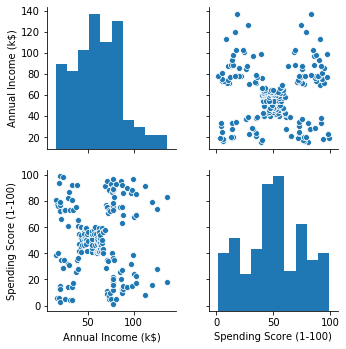

In [15]:
sns.pairplot(df)

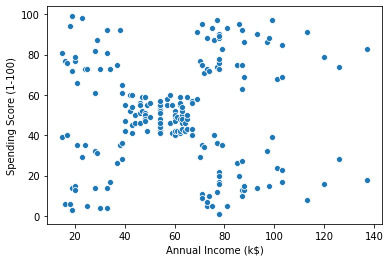

In [19]:
sns.scatterplot('Annual Income (k$)','Spending Score (1-100)',data =df)

In [21]:
from sklearn.cluster import KMeans

In [22]:
km = KMeans(n_clusters = 5)

In [24]:
km.fit_predict(df)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

In [35]:
km = KMeans(n_clusters = 5) #MOre the clusters less WCSs value less the cluster more wcss value

In [36]:
km.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [38]:
km.inertia_ #wcss value

44448.45544793371

In [45]:
inr = []
for i in  range(1,41):
    km = KMeans(n_clusters = i)
    km.fit(df)
    inr.append(km.inertia_)
    

In [46]:
inr

[269981.28,
 181363.59595959596,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37265.86520484347,
 30241.34361793659,
 24999.368258611692,
 22842.540388689325,
 19669.32843887379,
 17595.28888108518,
 16174.045565995912,
 14271.670282658517,
 13587.346204599495,
 11746.86780105859,
 11007.982969223758,
 10296.14588989442,
 9452.232381748687,
 8786.057560458474,
 8251.148446488152,
 7613.830415075121,
 7411.317645405177,
 6870.86543113749,
 6332.957999108735,
 6048.729667554668,
 5606.368498168498,
 5392.160991785991,
 5345.143473193473,
 5013.755547230547,
 4713.478488178488,
 4333.043795093796,
 4454.478066378066,
 4085.1718226218227,
 3809.8279220779223,
 3709.084693084693,
 3535.664033189033,
 3374.1459096459093,
 3127.6072510822514,
 2909.9536130536135,
 2837.6699494949494]

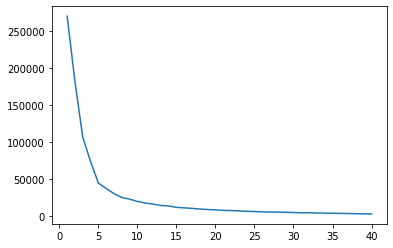

In [53]:
plt.plot(range(1,41),inr)

In [50]:
km = KMeans(n_clusters = 5)

In [51]:
km.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [54]:
cluster_output = km.predict(df)

In [55]:
df['cluster_output'] = cluster_output

In [67]:
km.cluster_centers_

array([[26.30434783, 20.91304348],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636]])

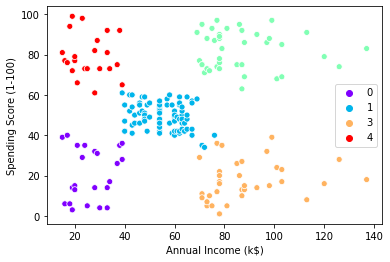

In [58]:
sns.scatterplot('Annual Income (k$)','Spending Score (1-100)',data =df,hue=cluster_output,palette='rainbow')

In [59]:
arr = km.cluster_centers_ #n dimensional array

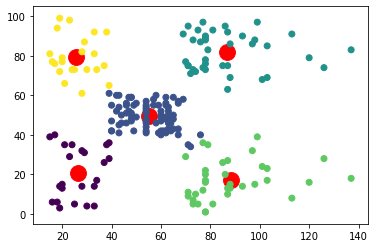

In [66]:
plt.scatter(arr[:,0],arr[:,1],s = 250, c='red')
plt.scatter(df.values[:,0],df.values[:,1],c=df['cluster_output'])